# Imbalanced

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

In [150]:
df = pd.read_excel("data/imbalanced_dataset_wdev.xlsx")

In [151]:
df

,Record,Loss,Dev,AY,EvalYr
0,1,0.000,1,2000,2001
1,1,3.500,2,2000,2002
2,1,4.375,3,2000,2003
3,1,4.550,4,2000,2004
4,1,4.900,5,2000,2005
...,...,...,...,...,...
727,122,1.000,2,2001,2003
728,122,1.250,3,2001,2004
729,122,1.300,4,2001,2005
730,122,1.400,5,2001,2006


## Dummy Data

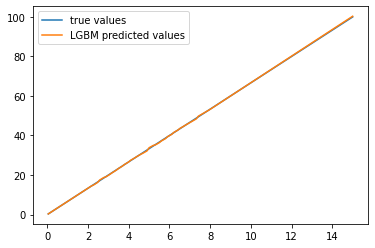

In [152]:
# Create an LGBM model
params = {
    'objective': 'regression',
    'linear_tree': True,
}
model = LGBMRegressor(**params)

# Create time serie timestamp indices
ts = np.linspace(0, 10, 100)
X = pd.DataFrame({'ts': ts})

# Generate signal to predict using a simple linear system
y = ts * 6.66

# Train LGBM model
model.fit(X, y)

# Create prediction inputs. Start with timestamp indices
# Shift the initial time range by 0.05 to force interpolation and augment if to force extrapolation
x_preds = pd.DataFrame({'ts': list(ts + 0.05) + [11, 12, 13, 14, 15]})
preds = model.predict(x_preds)
# Plot results.
# LGBM with linear tree can extrapolate
plt.plot(x_preds, x_preds['ts'] * 6.66, label='true values')
plt.plot(x_preds, preds, label='LGBM predicted values')
plt.legend()
# plt.savefig('lgbm_linear.png')
plt.show()

## Real Data

In [153]:
# Create an LGBM model
params = {
    'objective': 'regression',
    'linear_tree': True, #for forecasting
#     'lambda_l1 ': 0.2, 
}
model2 = LGBMRegressor(**params)

In [154]:
X = df[['Dev']]

In [155]:
X

,Dev
0,1
1,2
2,3
3,4
4,5
...,...
727,2
728,3
729,4
730,5


In [156]:
y = df['Loss']

<AxesSubplot:>

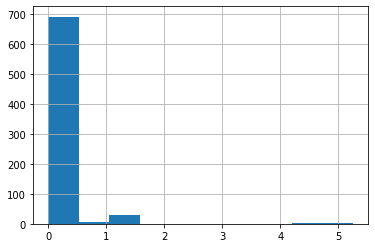

In [157]:
y.hist()

In [158]:
df.groupby('Dev').mean()

,Record,Loss,AY,EvalYr
Dev,,,,
1,61.5,0.000000,2000.540984,2001.540984
2,61.5,0.086066,2000.540984,2002.540984
3,61.5,0.107582,2000.540984,2003.540984
4,61.5,0.111885,2000.540984,2004.540984
5,61.5,0.120492,2000.540984,2005.540984
6,61.5,0.129098,2000.540984,2006.540984


In [159]:
# Train LGBM model
model2.fit(X, y)

LGBMRegressor(linear_tree=True, objective='regression')

In [160]:
y_pred = model2.predict(X)

In [161]:
y_pred

array([2.45747122e-06, 8.60657472e-02, 1.07581573e-01, 1.11884733e-01,
       1.20491055e-01, 1.29097388e-01, 2.45747122e-06, 8.60657472e-02,
       1.07581573e-01, 1.11884733e-01, 1.20491055e-01, 1.29097388e-01,
       2.45747122e-06, 8.60657472e-02, 1.07581573e-01, 1.11884733e-01,
       1.20491055e-01, 1.29097388e-01, 2.45747122e-06, 8.60657472e-02,
       1.07581573e-01, 1.11884733e-01, 1.20491055e-01, 1.29097388e-01,
       2.45747122e-06, 8.60657472e-02, 1.07581573e-01, 1.11884733e-01,
       1.20491055e-01, 1.29097388e-01, 2.45747122e-06, 8.60657472e-02,
       1.07581573e-01, 1.11884733e-01, 1.20491055e-01, 1.29097388e-01,
       2.45747122e-06, 8.60657472e-02, 1.07581573e-01, 1.11884733e-01,
       1.20491055e-01, 1.29097388e-01, 2.45747122e-06, 8.60657472e-02,
       1.07581573e-01, 1.11884733e-01, 1.20491055e-01, 1.29097388e-01,
       2.45747122e-06, 8.60657472e-02, 1.07581573e-01, 1.11884733e-01,
       1.20491055e-01, 1.29097388e-01, 2.45747122e-06, 8.60657472e-02,
      

In [162]:
res_df = X.copy(deep=True)
res_df['Loss_pred'] = y_pred
res_df.head()

,Dev,Loss_pred
0,1,0.000002
1,2,0.086066
2,3,0.107582
3,4,0.111885
4,5,0.120491


In [163]:
res_df.groupby('Dev').mean()

,Loss_pred
Dev,
1,0.000002
2,0.086066
3,0.107582
4,0.111885
5,0.120491
6,0.129097


### Extrapolation

In [164]:
X_later = pd.DataFrame(np.linspace(0,10,11),columns=['Dev'])

res2_df = X_later.copy(deep=True)

res2_df["Loss_pred"] = model2.predict(X_later)


In [165]:
res2_df

,Dev,Loss_pred
0,0.0,0.083268
1,1.0,0.000002
2,2.0,0.086066
3,3.0,0.107582
4,4.0,0.111885
5,5.0,0.120491
6,6.0,0.129097
7,7.0,0.134584
8,8.0,0.140070
9,9.0,0.145557


**Successful extrapolation**

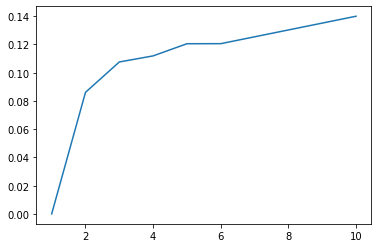

In [211]:
plt.plot(res2_df['Dev'],res2_df['Loss_pred'])

## Train Test Split w AY

In [172]:
df

,Record,Loss,Dev,AY,EvalYr
0,1,0.000,1,2000,2001
1,1,3.500,2,2000,2002
2,1,4.375,3,2000,2003
3,1,4.550,4,2000,2004
4,1,4.900,5,2000,2005
...,...,...,...,...,...
727,122,1.000,2,2001,2003
728,122,1.250,3,2001,2004
729,122,1.300,4,2001,2005
730,122,1.400,5,2001,2006


In [184]:
split_yr =  df["AY"].unique()[-1] # use last as test
print(split_yr)
train_mask = df["AY"] < split_yr

2001


In [185]:
train_df = df.loc[train_mask,:]
test_df = df.loc[~train_mask,:]

In [187]:
train_df.groupby("Dev").mean()

,Record,Loss,AY,EvalYr
Dev,,,,
1,55.214286,0.000000,2000.0,2001.0
2,55.214286,0.080357,2000.0,2002.0
3,55.214286,0.100446,2000.0,2003.0
4,55.214286,0.104464,2000.0,2004.0
5,55.214286,0.112500,2000.0,2005.0
6,55.214286,0.120536,2000.0,2006.0


In [188]:
test_df.groupby("Dev").mean()

,Record,Loss,AY,EvalYr
Dev,,,,
1,66.833333,0.000000,2001.0,2002.0
2,66.833333,0.090909,2001.0,2003.0
3,66.833333,0.113636,2001.0,2004.0
4,66.833333,0.118182,2001.0,2005.0
5,66.833333,0.127273,2001.0,2006.0
6,66.833333,0.136364,2001.0,2007.0


## Split with EvalYr

In [190]:
df

,Record,Loss,Dev,AY,EvalYr
0,1,0.000,1,2000,2001
1,1,3.500,2,2000,2002
2,1,4.375,3,2000,2003
3,1,4.550,4,2000,2004
4,1,4.900,5,2000,2005
...,...,...,...,...,...
727,122,1.000,2,2001,2003
728,122,1.250,3,2001,2004
729,122,1.300,4,2001,2005
730,122,1.400,5,2001,2006


In [191]:
split_yr =  df["EvalYr"].unique()[-1] # use last as test
print(split_yr)
train_mask = df["EvalYr"] < split_yr

2007


In [192]:
train_df = df.loc[train_mask,:]
test_df = df.loc[~train_mask,:]

In [193]:
train_df.groupby("Dev").mean()

,Record,Loss,AY,EvalYr
Dev,,,,
1,61.500000,0.000000,2000.540984,2001.540984
2,61.500000,0.086066,2000.540984,2002.540984
3,61.500000,0.107582,2000.540984,2003.540984
4,61.500000,0.111885,2000.540984,2004.540984
5,61.500000,0.120492,2000.540984,2005.540984
6,55.214286,0.120536,2000.000000,2006.000000


In [194]:
test_df.groupby("Dev").mean()

,Record,Loss,AY,EvalYr
Dev,,,,
6,66.833333,0.136364,2001.0,2007.0


### remodel

In [199]:
# Create an LGBM model
params = {
    'objective': 'regression',
    'linear_tree': True, #for forecasting
#     'lambda_l1 ': 0.2, 
}
model = LGBMRegressor(**params)

In [200]:
X = train_df[["Dev"]]
y = train_df["Loss"]

In [201]:
model.fit(X,y)

LGBMRegressor(linear_tree=True, objective='regression')

In [202]:
model.predict(test_df[["Dev"]])

array([0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485])

In [203]:
model.predict(test_df[["Dev"]])

array([0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485, 0.12053485, 0.12053485, 0.12053485, 0.12053485,
       0.12053485])

### Extrapolation x2

In [207]:
X_later = pd.DataFrame(np.linspace(1,10,10),columns=['Dev'])

res2_df = X_later.copy(deep=True)

res2_df["Loss_pred"] = model.predict(X_later)


In [208]:
res2_df

,Dev,Loss_pred
0,1.0,0.000002
1,2.0,0.086066
2,3.0,0.107581
3,4.0,0.111885
4,5.0,0.120491
5,6.0,0.120535
6,7.0,0.125389
7,8.0,0.130243
8,9.0,0.135096
9,10.0,0.139950


**Successful extrapolation**

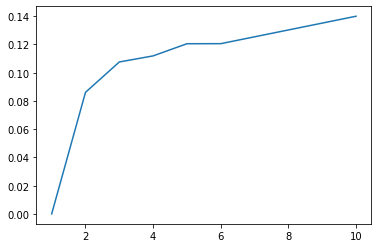

In [210]:
plt.plot(res2_df['Dev'],res2_df['Loss_pred'])